## Project Overview
Dataset yang digunakan untuk tugas ini yaitu dataset publik dari keaggle yaitu Uber and Lyft Dataset Boston, MA. Dataset ini berisi informasi mengenai record transaksi perjalanan menggunakan taksi jenis uber dan lyft. Tujuan utama dari penelitian ini adalah untuk memprediksi harga perjalanan yang paling sesuai dengan mengimplementasikan analisa prediction menggunakan algoritma Linear Regression. Namun disini juga terdapat implementasi dari algoritma Random forest regression, Deccision tree, dan SVR (Support Vector Regression). Sebelum melakukan proses modeling menggunakan algoritma yang telah disebutkan sebelumnya, harus dilakukan pemilihan fitur yang tepat. Dikarenakan dataset ini memiliki dimensi yang tinggi dan atribut-atribut yang berkorelasi.Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya.

#### Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

#### Attribute Information:
1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe t

Tools yang digunakan pada project ini yaitu VsCode

## Library & Package

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import skew
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [346]:
pd.set_option('display.max_columns', None)

#handle understaning missing value
missing_values = ['na', "NA", 'NaN','-']

rideshare = pd.read_csv('rideshare_kaggle.csv', na_values=missing_values)
rideshare

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [347]:
#cek baris dan kolom
baris,kolom = rideshare.shape
print('Dataset ini terdapat: ')
print(baris, 'baris')
print(kolom, 'kolom')

Dataset ini terdapat: 
693071 baris
57 kolom


In [348]:
#cek nama kolom
rideshare.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [349]:
#Melihat informasi tipe data pada setiap kolom
rideshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [350]:
# Melihat statistik deskriptif dari data
rideshare.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [351]:
rideshare.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## Data Cleaning
Terdapat nilai missing value sebanyak 55095 pada kolom price. Dikarenakan fitur price merupakan variable dependent pada projek ini,jika memaksa mengisi missing value pada fitur price akan mengakibatkan lebih banyak nilai yang error dan akurasi yang kurang. Maka missing value tersebut akan dihapus.

In [352]:
#hapus missing value
df_rideshare = rideshare.dropna(subset=['price']).reset_index()

In [353]:
#cek missing value
df_rideshare.isnull().sum()

index                          0
id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatur

Hapus fitur yang tidak memiliki dependency terhadap predictand (price) dan karena sudah ada atribut jarak dan parameter waktu (hours, day, month). Maka beberapa atribut yang berhubungan dengan hal tersebut akan dihapus.

In [354]:
#hapus kolom yang tidak berhubungan dengan price
df_rideshare = df_rideshare.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
             'windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
             'apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','latitude','longitude'], axis=1)

In [355]:
#cek data
df_rideshare.head().T

,0,1,2,3,4
index,0,1,2,3,4
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft
product_id,lyft_line,lyft_premier,lyft,lyft_luxsuv,lyft_plus
name,Shared,Lux,Lyft,Lux Black XL,Lyft XL


In [356]:
# cek korelasi antara fitur price dan fitur temperature
new_riedshare = df_rideshare[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax']]

#cek data
new_riedshare.head().T

,0,1,2,3,4
price,5.000000e+00,1.100000e+01,7.000000e+00,2.600000e+01,9.000000e+00
temperature,4.234000e+01,4.358000e+01,3.833000e+01,3.438000e+01,3.744000e+01
apparentTemperature,3.712000e+01,3.735000e+01,3.293000e+01,2.963000e+01,3.088000e+01
temperatureHigh,4.368000e+01,4.730000e+01,4.755000e+01,4.503000e+01,4.218000e+01
temperatureLow,3.419000e+01,4.210000e+01,3.310000e+01,2.890000e+01,3.671000e+01
apparentTemperatureHigh,3.795000e+01,4.392000e+01,4.412000e+01,3.853000e+01,3.575000e+01
apparentTemperatureLow,2.739000e+01,3.620000e+01,2.911000e+01,2.620000e+01,3.029000e+01
temperatureMin,3.989000e+01,4.049000e+01,3.536000e+01,3.467000e+01,3.310000e+01
temperatureHighTime,1.544969e+09,1.543252e+09,1.543320e+09,1.543511e+09,1.543421e+09
temperatureMax,4.368000e+01,4.730000e+01,4.755000e+01,4.503000e+01,4.218000e+01


<Axes: >

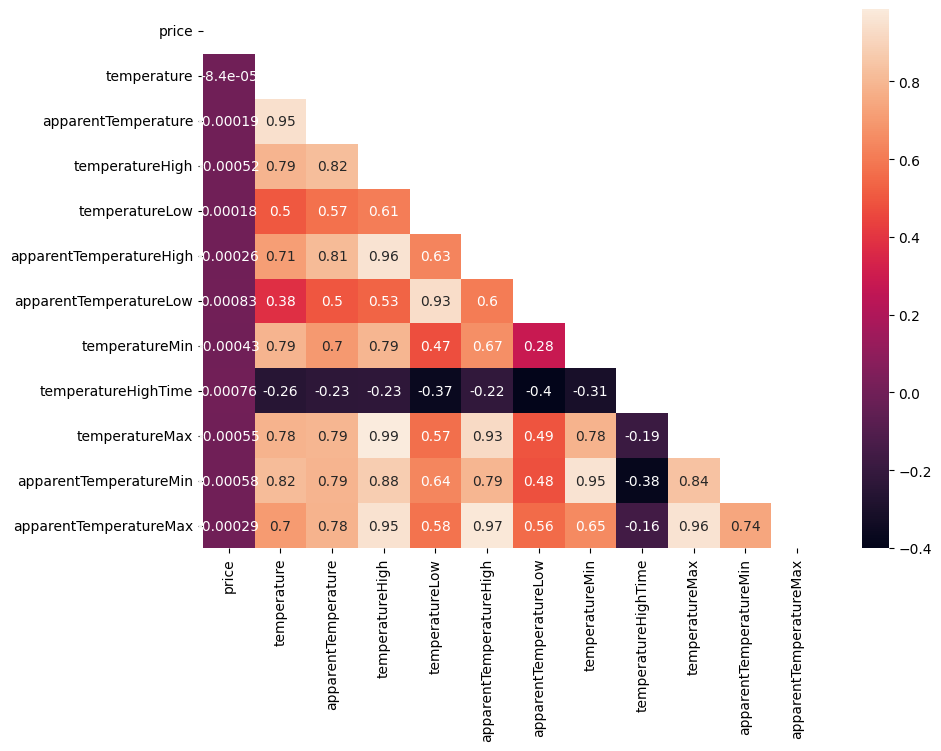

In [357]:
#visualisasi korelasi
plt.figure(figsize=(10,7))
sns.heatmap(new_riedshare.corr(), annot=True, mask=np.triu(new_riedshare.corr()))

**Insight:** Dari hasil visualisasi,terlihat bahwa kolom price dan kolom yang berhubungan temperatur memiliki korelasi yang lemah. Maka, kolom tersebut akan dihapus.

In [358]:
#hapus kolom yang berhubungan dengan temperature karena memiliki korelasi yang lemah dengan price
df_rideshare = df_rideshare.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
            'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin',
            'apparentTemperatureMax'], axis=1)

df_rideshare.head().T

,0,1,2,3,4
index,0,1,2,3,4
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft
product_id,lyft_line,lyft_premier,lyft,lyft_luxsuv,lyft_plus
name,Shared,Lux,Lyft,Lux Black XL,Lyft XL


### Kelompokan data numerical dan categorical

#### 1. Data Category

In [359]:
#category data
data_cat = df_rideshare.select_dtypes(include=['object','category']).columns.tolist()
categorical_data = df_rideshare[data_cat]
categorical_data.head()

,timezone,source,destination,cab_type,product_id,name,short_summary,icon
0,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,partly-cloudy-night
1,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,rain
2,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,clear-night
3,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,clear-night
4,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,partly-cloudy-night


In [360]:
#cek unique value
for col in categorical_data.columns:
    print('Unique value: ', col)
    print('-'*25)
    print(categorical_data[col].unique())
    print('-'*25)

Unique value:  timezone
-------------------------
['America/New_York']
-------------------------
Unique value:  source
-------------------------
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
-------------------------
Unique value:  destination
-------------------------
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']
-------------------------
Unique value:  cab_type
-------------------------
['Lyft' 'Uber']
-------------------------
Unique value:  product_id
-------------------------
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c

In [361]:
#cek nilai prouct_id
categorical_data['product_id'].value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

Jumlah data > 50%, maka timezone kita dapat hapus

In [362]:
# hapus timezone
df_rideshare = df_rideshare.drop(['timezone', 'product_id'], axis=1)
df_rideshare.head().T

,0,1,2,3,4
index,0,1,2,3,4
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft
name,Shared,Lux,Lyft,Lux Black XL,Lyft XL
price,5.0,11.0,7.0,26.0,9.0
distance,0.44,0.44,0.44,0.44,0.44


#### 2. Data Numeric

In [363]:
#numeric data
data_num = df_rideshare.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_data = df_rideshare[data_num]
numeric_data.columns

Index(['index', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'moonPhase', 'precipIntensityMax'],
      dtype='object')

In [364]:
#analisis data numerik dan cek tingkat korelasi antar variabel numerik
climate_cols = ['price','precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax',]
new_data = df_rideshare[climate_cols]
new_data.head().T

,0,1,2,3,4
price,5.0000,11.0000,7.0000,26.00,9.0000
precipIntensity,0.0000,0.1299,0.0000,0.00,0.0000
precipProbability,0.0000,1.0000,0.0000,0.00,0.0000
humidity,0.6800,0.9400,0.7500,0.73,0.7000
windSpeed,8.6600,11.9800,7.3300,5.28,9.1400
windGust,9.1700,11.9800,7.3300,5.28,9.1400
visibility,10.0000,4.7860,10.0000,10.00,10.0000
dewPoint,32.7000,41.8300,31.1000,26.64,28.6100
pressure,1021.9800,1003.9700,992.2800,1013.73,998.3600
windBearing,57.0000,90.0000,240.0000,310.00,303.0000


<Axes: >

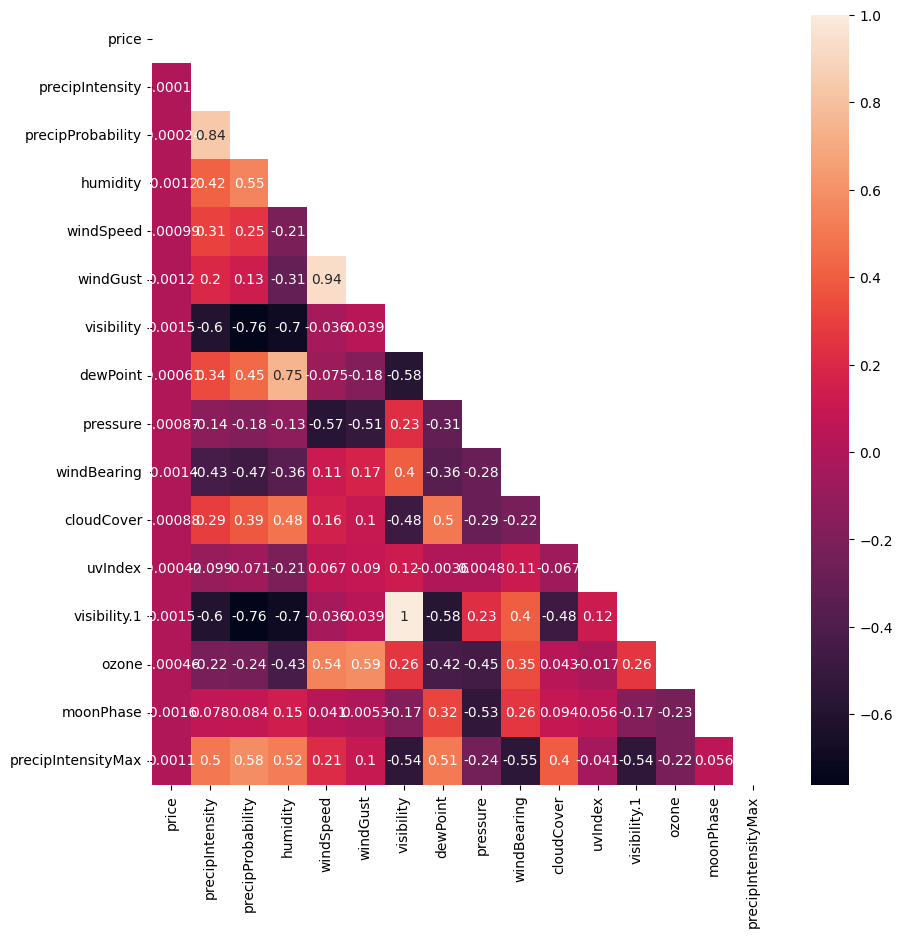

In [365]:
#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(new_data.corr(), annot=True, mask=np.triu(new_data.corr()))

**Insight:** semua fitur yang berhubungan dengan cuaca memiliki korelasi yang rendah hampir 0 terhadap kolom price. drop kolom kolom tersebut

In [366]:
climate_cols = ['precipIntensity','precipProbability','humidity','windSpeed','windGust',
               'visibility','dewPoint','pressure','windBearing','cloudCover','uvIndex','visibility.1',
               'ozone','moonPhase','precipIntensityMax']
df = df_rideshare.drop(climate_cols, axis=1)


df.head().T

,0,1,2,3,4
index,0,1,2,3,4
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft
name,Shared,Lux,Lyft,Lux Black XL,Lyft XL
price,5.0,11.0,7.0,26.0,9.0
distance,0.44,0.44,0.44,0.44,0.44


## EDA (exploratory data analysis)

In [367]:
#kelompokan data berdasarkan cab_type
uber_data = df[df['cab_type']=='Uber']
lyft_data = df[df['cab_type']=='Lyft']

1. Bagaimana korelasi antara kolom distance, surge multiplier dan price?

Text(0.5, 1.0, 'Lyft : Distance - Price')

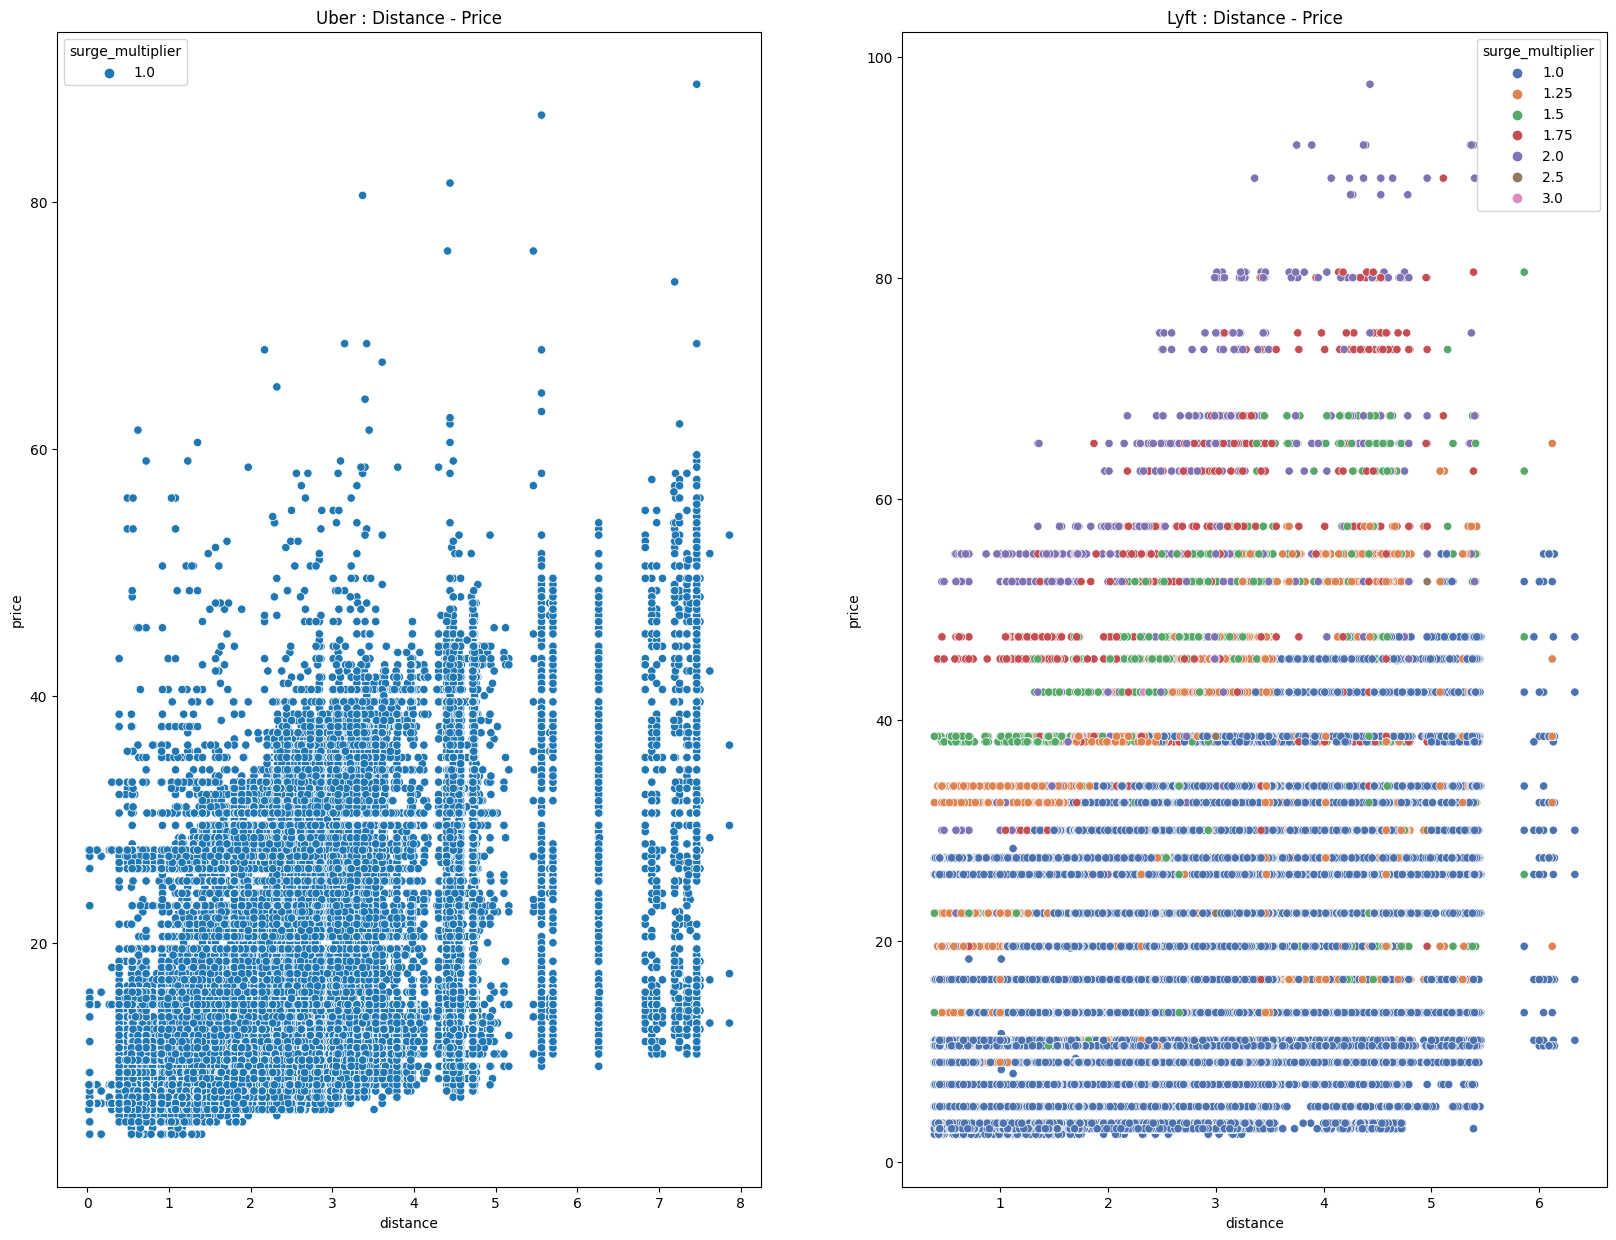

In [368]:
uber_sm_dis_price = uber_data[['distance','surge_multiplier','price']]
lyft_sm_dis_price = lyft_data[['surge_multiplier','distance','price']]

# plotting menggunakan scatter plot
plt.figure(figsize=(20,15))
plt.subplot(121)
sns.scatterplot(data = uber_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier').set_title("Uber : Distance - Price")

plt.subplot(122)
sns.scatterplot(data = lyft_sm_dis_price, x = 'distance', y='price', hue='surge_multiplier', palette='deep').set_title("Lyft : Distance - Price")


**Insight:** Visualisasi menunjukkan untuk data uber diatas dapat dilihat bahwa distance dan price tidak memiliki korelasi yang kuat, price tidak bertambah secara linier. sedangkan pada data lyft ketika distance bertambah, harga ikut bertambah. dapat dilihat juga bahwa dengan harga tertinggi, lebih banyak surge multiplier yang juga bertambah

2. Apa Top 5 source-destination pada cab jenis uber?

/tmp/ipykernel_55544/3274083279.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_top5["Source - Destination"] = uber_new_data["source"] + " - " + uber_new_data["destination"]


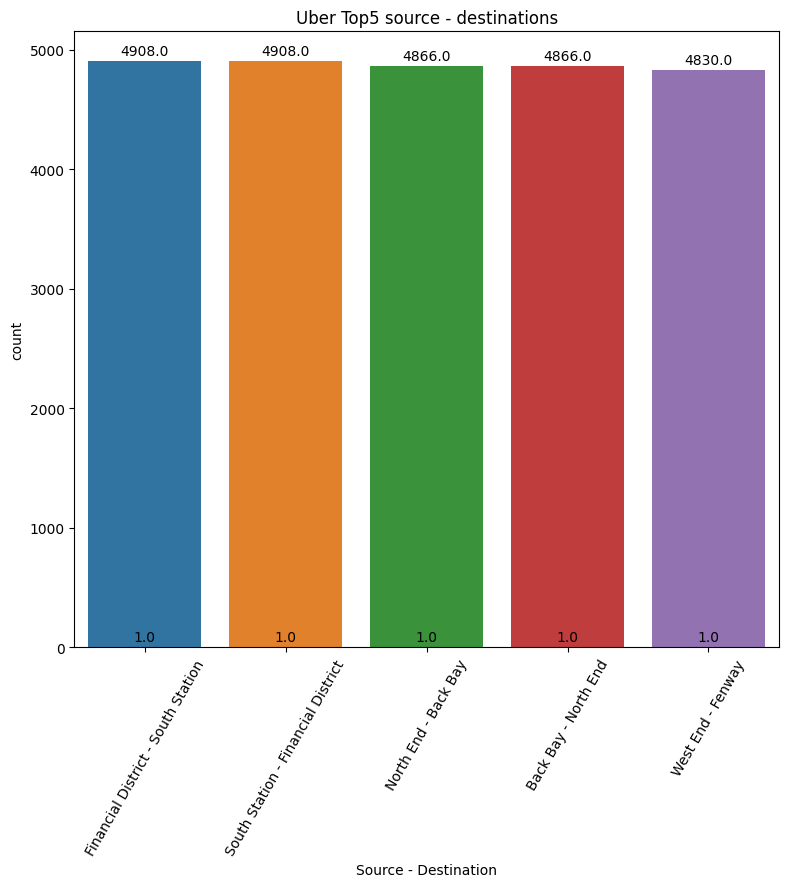

In [369]:
uber_new_data = uber_data.groupby(['source','destination']).size().reset_index()
uber_new_data.columns = ['source','destination','total']
uber_new_data.sort_values('total', ascending=False, inplace=True)
uber_top5 = uber_new_data.head(5)
uber_top5["Source - Destination"] = uber_new_data["source"] + " - " + uber_new_data["destination"]
uber_top5 = uber_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp =sns.barplot(data = uber_top5, x = "Source - Destination", y = "total")
bp.set_title("Uber Top5 source - destinations")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=uber_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

**Insight:** Financial District - South Station, begitupun sebaliknya menjadi Top 5 source-destination pada cabang jenis uber

3. Apa Top 5 source-destination pada cab jenis Lyft?

/tmp/ipykernel_55544/333912897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_top5["Source - Destination"] = lyft_new_data["source"] + " - " + lyft_new_data["destination"]


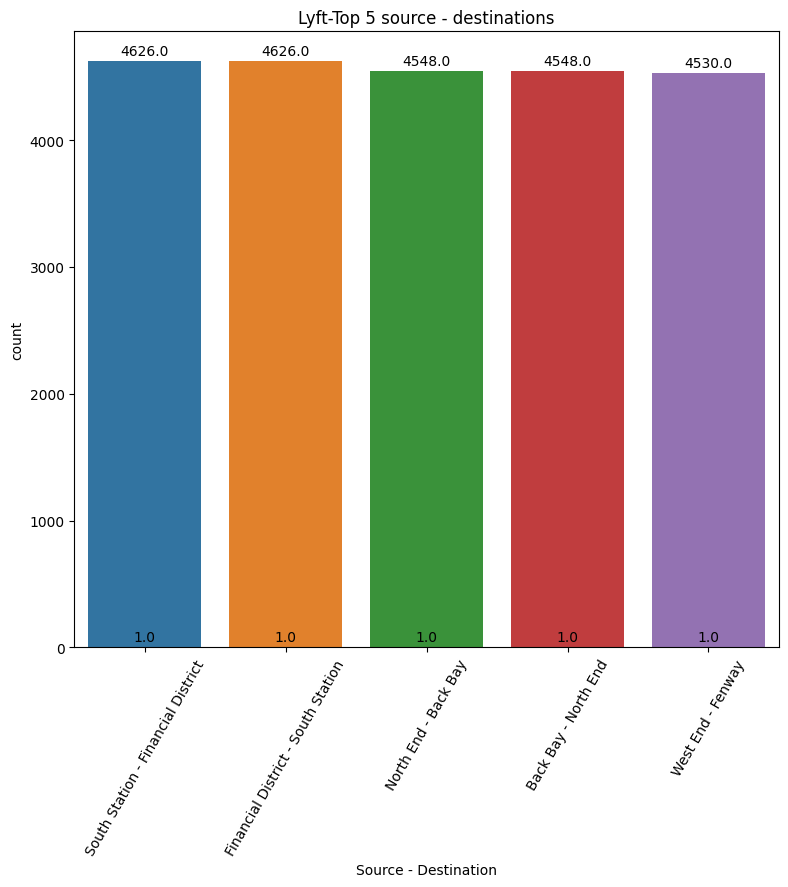

In [370]:
lyft_new_data = lyft_data.groupby(['source','destination']).size().reset_index()
lyft_new_data.columns = ['source','destination','total']
lyft_new_data.sort_values('total', ascending=False, inplace=True)
lyft_top5 = lyft_new_data.head(5)
lyft_top5["Source - Destination"] = lyft_new_data["source"] + " - " + lyft_new_data["destination"]
lyft_top5 = lyft_top5[["Source - Destination", "total"]]

#plotting bar plot
plt.figure(figsize=(20, 8))
plt.subplot(121)
bp =sns.barplot(data = lyft_top5, x = "Source - Destination", y = "total")
bp.set_title("Lyft-Top 5 source - destinations")
loc, labels = plt.xticks()
bp.set_xticklabels(labels, rotation=60);
ax = sns.countplot(x='Source - Destination', data=lyft_top5)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

**Insight:** Financial District - South Station, begitupun sebaliknya menjadi Top 5 source-destination pada cabang jenis Lyft

### Uber Data Exploration

In [371]:
#Ambil data uber dan hapus kolom cab_type, source, destination
uber = df[df['cab_type']=='Uber'].reset_index(drop=True)
uber = uber.drop(columns=['cab_type','source','destination'], axis=1)
uber.head(5)

,index,hour,day,month,name,price,distance,surge_multiplier,short_summary,icon
0,12,22,30,11,UberXL,12.0,1.11,1.0,Overcast,cloudy
1,13,10,13,12,Black,16.0,1.11,1.0,Clear,clear-night
2,14,19,13,12,UberX,7.5,1.11,1.0,Mostly Cloudy,partly-cloudy-day
3,15,23,16,12,WAV,7.5,1.11,1.0,Light Rain,rain
4,16,0,14,12,Black SUV,26.0,1.11,1.0,Overcast,cloudy


In [372]:
#cek describe data
uber.describe().T

,count,mean,std,min,25%,50%,75%,max
index,330568.0,347657.937060,200336.056904,12.00,174079.75,348082.50,520833.25,693070.00
hour,330568.0,11.608864,6.942370,0.00,6.00,12.00,18.00,23.00
day,330568.0,17.820176,9.973335,1.00,13.00,17.00,28.00,30.00
month,330568.0,11.586028,0.492544,11.00,11.00,12.00,12.00,12.00
price,330568.0,15.795343,8.560300,4.50,9.00,12.50,21.50,89.50
distance,330568.0,2.191386,1.178973,0.02,1.30,2.17,2.84,7.86
surge_multiplier,330568.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


In [373]:
#Ambil data uber yang bertipe object
uber_cat = uber.select_dtypes('object')
uber_cat.head()

,name,short_summary,icon
0,UberXL,Overcast,cloudy
1,Black,Clear,clear-night
2,UberX,Mostly Cloudy,partly-cloudy-day
3,WAV,Light Rain,rain
4,Black SUV,Overcast,cloudy


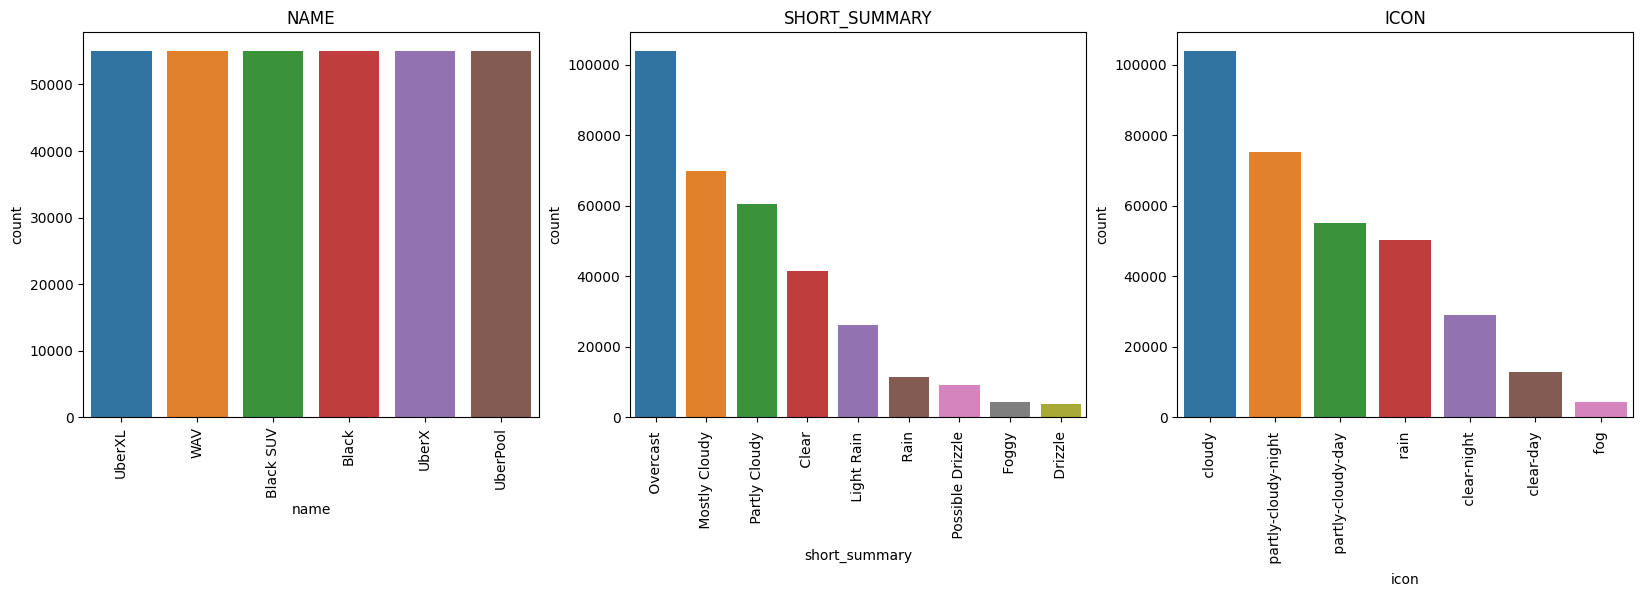

In [374]:
# buat visualisasi data kategorikal uber_cat yaitu name,short_summary,dan icon dengan for loop, kemudian filter data dari yang terbanyak ke terkecil. Terakhir gabungkan semua plot dengan satu kolom kesamping
row,kol,i = 1,3,1
plt.figure(figsize=(20,5))
for col in uber_cat.columns:
    plt.subplot(row,kol,i)
    plt.title(col.upper(), fontsize = 12)
    sns.countplot(x=col, data=uber, order=uber[col].value_counts().index)
    plt.xticks(rotation = 90)
    i +=1
plt.show()


**Insight:** transaksi berdasarkan nama cab pada uber memiliki jumlah yang merata yaitu diatas nilai 50000, melalui visualisasi diagram diatas berdasarkan fitur short_summary jumlah transaksi tertinggi terjadi pada hari ketika mendung dengan jumlah diperkirakan lebih dari 100000 data dan transaksi terendah pada hari ketika mengalami grimis dengan jumalah data kurang dari 20000.

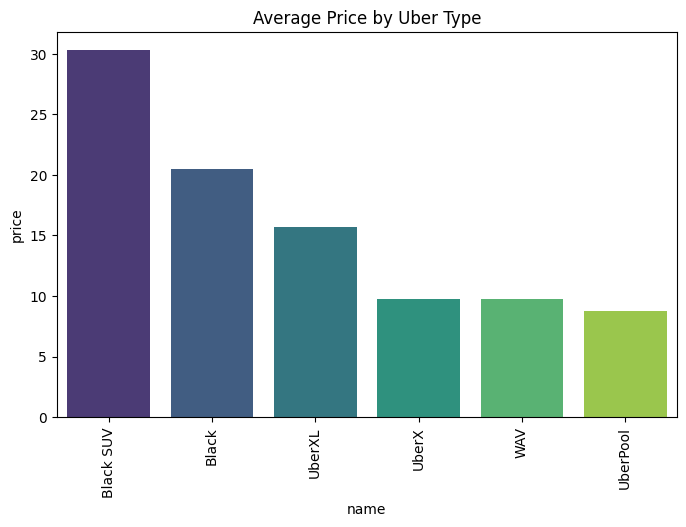

In [375]:
level_price = uber.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (8,5))
sns.barplot(x = level_price.index, y = level_price["price"], order = level_price.sort_values("price", ascending = False).index, palette = "viridis")
plt.xticks(rotation = 90)
plt.title("Average Price by Uber Type")
plt.show()

**Insight:** dapat dilihat bahwa harga tertinggi pada cab jenis uber yaitu Black SUV dan level harga terendah adalah UberPool

### Lyft Data Exploration

In [376]:
#Ambil data uber dan hapus kolom cab_type, source, destination
lyft = df[df['cab_type']=='Lyft'].reset_index(drop=True)
lyft = lyft.drop(columns=['cab_type','source','destination'], axis=1)
lyft.head()

,index,hour,day,month,name,price,distance,surge_multiplier,short_summary,icon
0,0,9,16,12,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,1,2,27,11,Lux,11.0,0.44,1.0,Rain,rain
2,2,1,28,11,Lyft,7.0,0.44,1.0,Clear,clear-night
3,3,4,30,11,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,4,3,29,11,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


In [377]:
#cek describe data
lyft.describe().T

,count,mean,std,min,25%,50%,75%,max
index,307408.0,345142.857069,199754.103330,0.00,172314.75,344388.50,518558.00,693053.00
hour,307408.0,11.628920,6.955654,0.00,6.00,12.00,18.00,23.00
day,307408.0,17.773477,9.991441,1.00,13.00,17.00,28.00,30.00
month,307408.0,11.587112,0.492354,11.00,11.00,12.00,12.00,12.00
price,307408.0,17.351396,10.019171,2.50,9.00,16.50,22.50,97.50
distance,307408.0,2.186976,1.086622,0.39,1.27,2.14,2.97,6.33
surge_multiplier,307408.0,1.031270,0.135610,1.00,1.00,1.00,1.00,3.00


In [378]:
#Ambil data lyft yang bertipe object
lyft_cat = lyft.select_dtypes('object')
lyft_cat.head()

,name,short_summary,icon
0,Shared,Mostly Cloudy,partly-cloudy-night
1,Lux,Rain,rain
2,Lyft,Clear,clear-night
3,Lux Black XL,Clear,clear-night
4,Lyft XL,Partly Cloudy,partly-cloudy-night


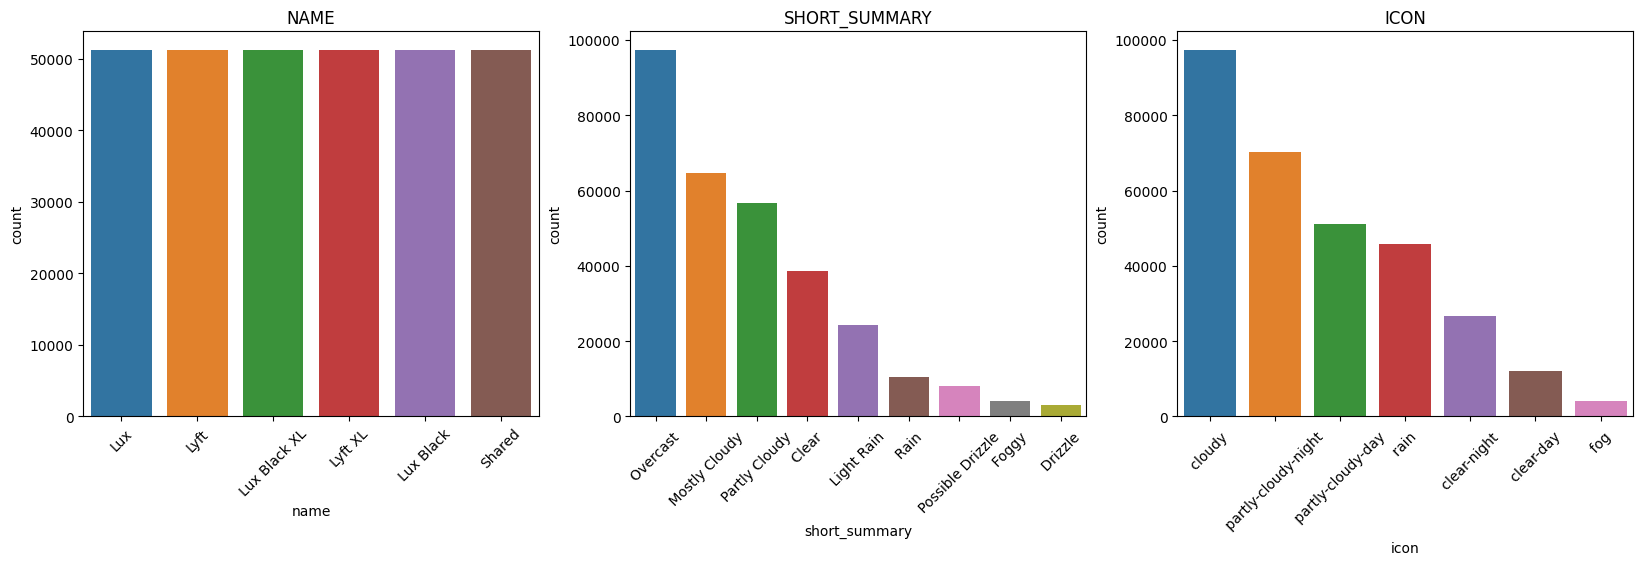

In [379]:
row,kol,i = 1,3,1
plt.figure(figsize=(20,5))
for col in lyft_cat.columns:
    plt.subplot(row,kol,i)
    plt.title(col.upper(), fontsize = 12)
    sns.countplot(x=col, data=lyft, order=lyft[col].value_counts().index)
    plt.xticks(rotation = 45)
    i +=1
plt.show()

**Insight:** transaksi berdasarkan nama cab pada uber memiliki jumlah yang merata yaitu diatas nilai 50000, melalui visualisasi diagram diatas berdasarkan fitur short_summary jumlah transaksi tertinggi terjadi pada hari ketika mendung dengan jumlah diperkirakan lebih dari 80000 data dan transaksi terendah pada hari ketika mengalami gerimis dengan jumalah data kurang dari 20000.

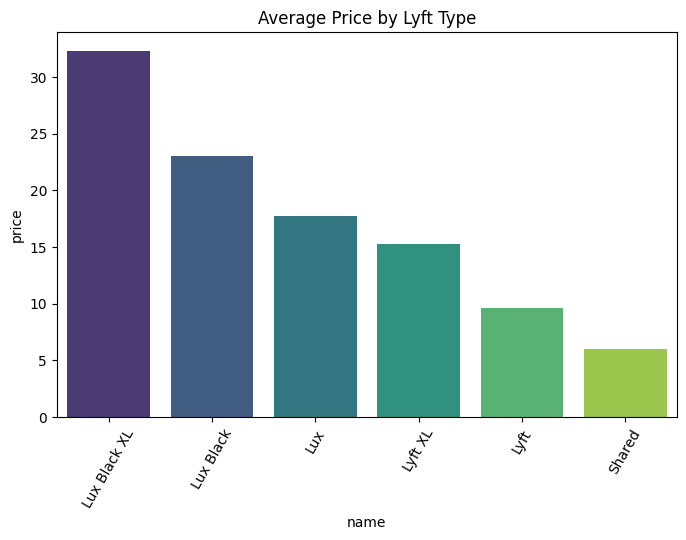

In [380]:
level_price = lyft.groupby(["name"])[["price"]].mean()
plt.figure(figsize = (8,5))
sns.barplot(x = level_price.index, y = level_price["price"], order = level_price.sort_values("price", ascending = False).index, palette = "viridis")

plt.xticks(rotation = 60)
plt.title("Average Price by Lyft Type")
plt.show()

**Insight:** diagram bar diatas menunjukkan bahwa cab jenis Lyft dengan nama Lux Black XL memiliki level harga tertinggi dengan nilai diatas 30 sedangkan level harga terendah yaitu cab jenis Lyft Shared.

## Data Preprocessing

In [381]:
# Binary encode kolom cab_type
df['cab_type'] = df['cab_type'].replace({'Lyft': 0, 'Uber': 1})

In [382]:
#Encoding semua kolom bertipe cateogory dengan onehot encoder
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_cols)

['source', 'destination', 'name', 'short_summary', 'icon']


In [383]:
#inisiasi OneHotEncoder dan menggabungkan original dataframe dengan kolom encode ke dataframe
for col in cat_cols:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoder_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        encoder_df.columns = encoder.get_feature_names_out([col])
        df = df.drop(col, axis=1)
        df = pd.concat([df, encoder_df], axis=1)

In [384]:
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'source_Back Bay', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberX

In [385]:
# analisis dan cek korelasi antara price dengan kolom yang berhubungan dengan source
source_cols = [col for col in df.columns if 'source' in col]

#membuat dataframe baru yang berisi kolom source dan price
df_source = df[['price'] + source_cols]
df_source.head()

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

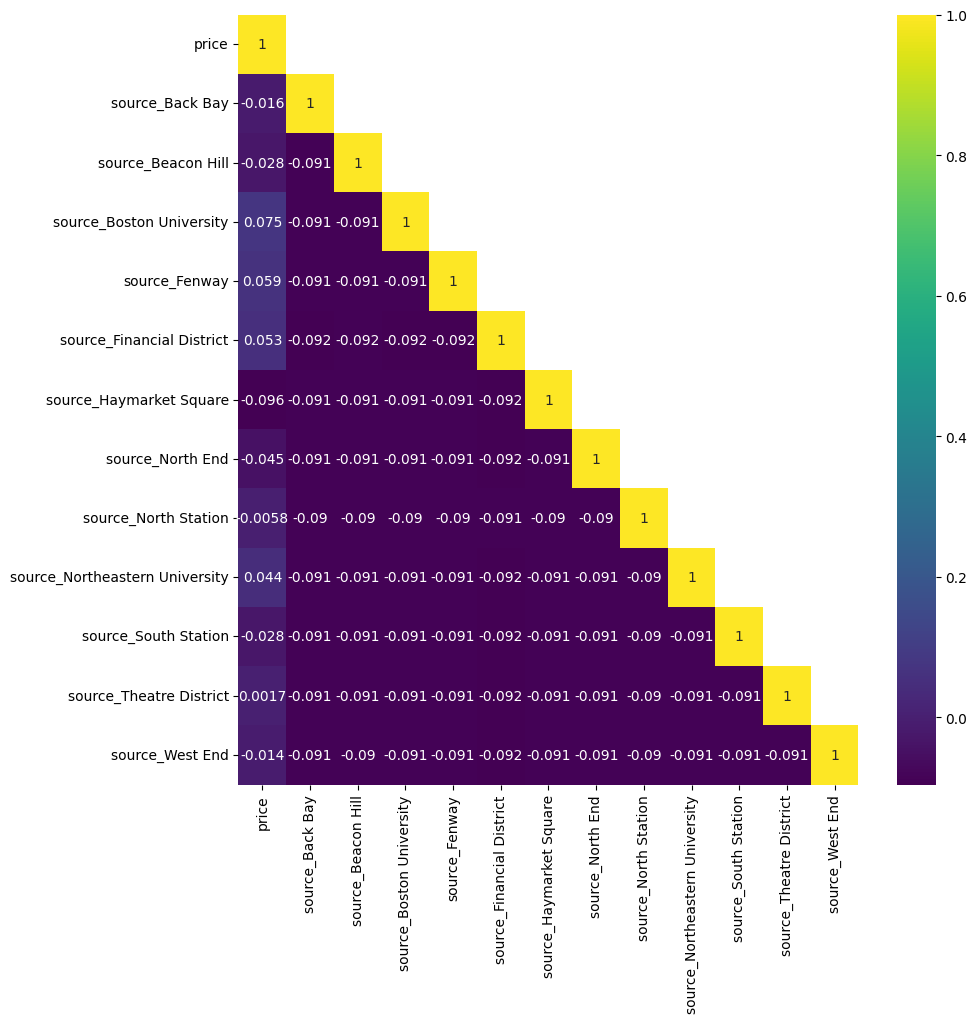

In [386]:
#membuat visualisasi korelasi antara price dengan kolom yang berhubungan dengan source
plt.figure(figsize=(10,10))
sns.heatmap(df_source.corr(), annot=True, cmap='viridis', mask=np.triu(df_source.corr(), k=1))

**Insight:** kolom yang berhubungan dengan source memiliki pengaruh yang cukup signifikan terhadap price. kemudian cek kolom destinasi dengan cara yang sama untuk melihat rate korelasi terhadap price

In [387]:
#cek korelasi antara price dengan kolom yang berhubungan dengan destination
destination_cols = [col for col in df.columns if 'destination' in col]

#membuat dataframe baru yang berisi kolom destination dan price
df_destination = df[['price'] + destination_cols]
df_destination.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

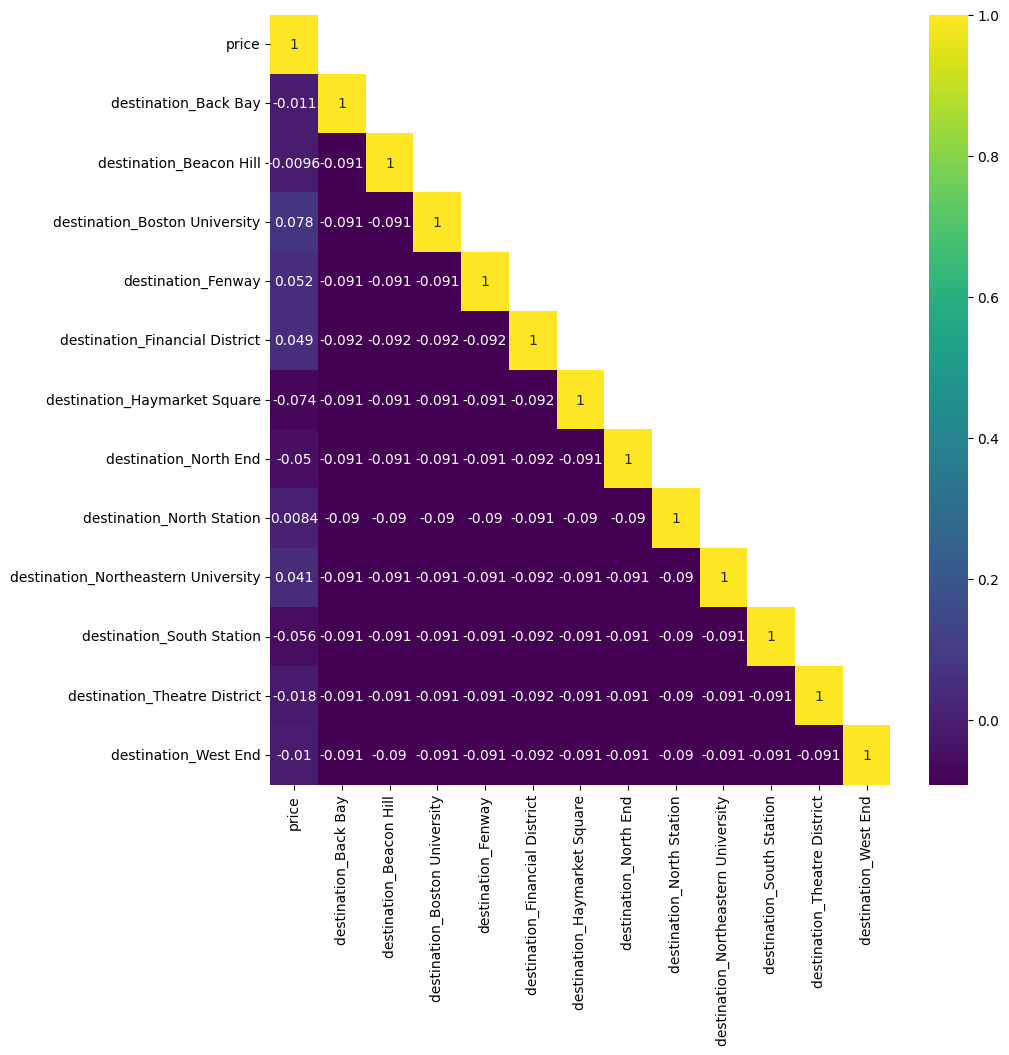

In [388]:
#membuat visualisasi korelasi antara price dengan kolom yang berhubungan dengan destination
plt.figure(figsize=(10,10))
sns.heatmap(df_destination.corr(), annot=True, cmap='viridis', mask=np.triu(df_destination.corr(), k=1))

**Insight:** dari plotting heatmap diatas menunjukkan bahwa nilai korelasi dari source dan destination terhadap harga sangat rendah, jadi hapus mereka dan merestrukturisasi dataframe

In [389]:
#hapus kolom source dan destination
df = df.drop(columns=['source_Back Bay','source_Beacon Hill', 'source_Boston University', 'source_Fenway', 'source_Financial District', 'source_Haymarket Square', 'source_North End', 'source_North Station', 'source_Northeastern University', 'source_South Station', 'source_Theatre District', 'source_West End','destination_Back Bay', 'destination_Beacon Hill', 'destination_Boston University', 'destination_Fenway', 'destination_Financial District', 'destination_Haymarket Square', 'destination_North End', 'destination_North Station', 'destination_Northeastern University', 'destination_South Station', 'destination_Theatre District', 'destination_West End'], axis=1)

#cek dataframe
df.head()

,index,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [390]:
#cek korelasi antara summary dengan price
summary_cols = [col for col in df.columns if 'summary' in col]

#membuat dataframe baru yang berisi kolom summary dan price
df_summary = df[['price'] + summary_cols]

#cek data
df_summary.head()

,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: >

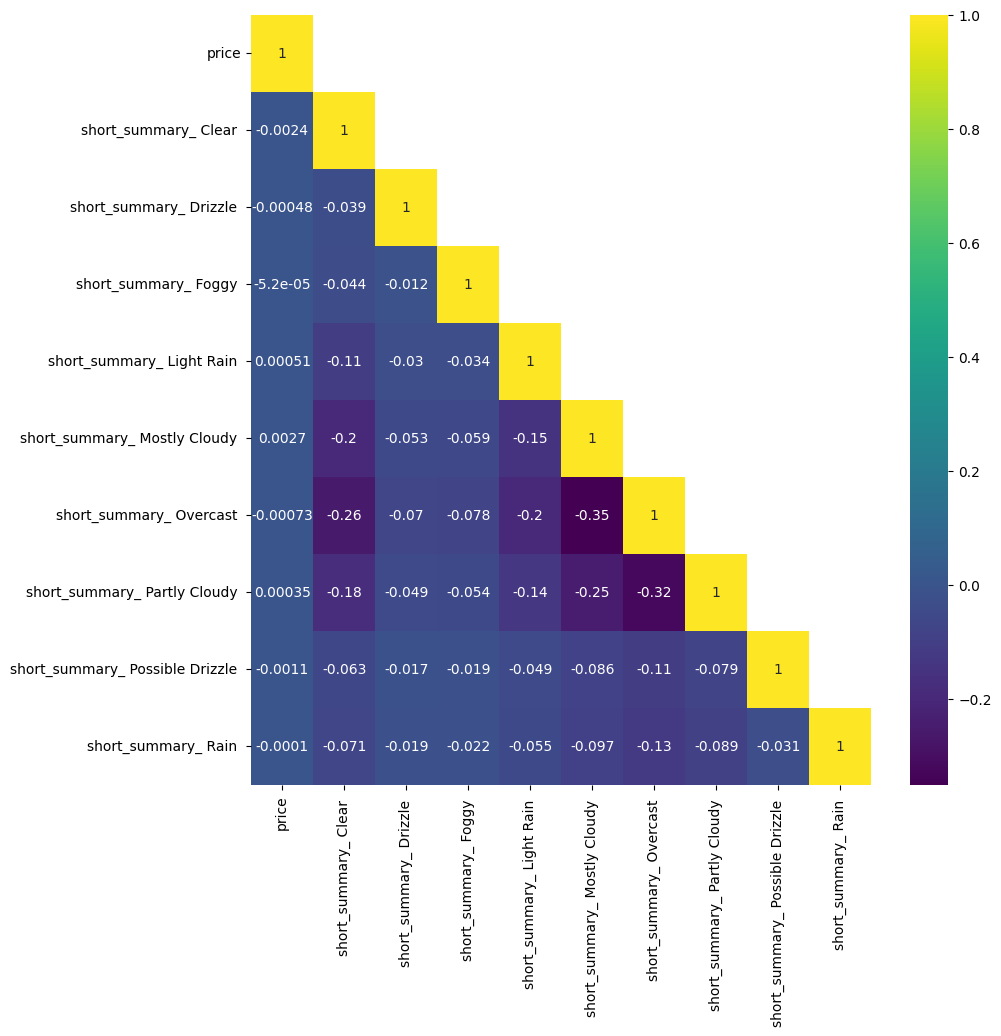

In [391]:
#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_summary.corr(), annot=True, cmap='viridis', mask=np.triu(df_summary.corr(), k=1))

In [392]:
#cek korealsi antara kolom icon dan price
icon_cols = [col for col in df.columns if 'icon' in col]

#membuat dataframe baru yang berisi kolom icon dan price
df_icon = df[['price'] + icon_cols]

#cek data
df_icon.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

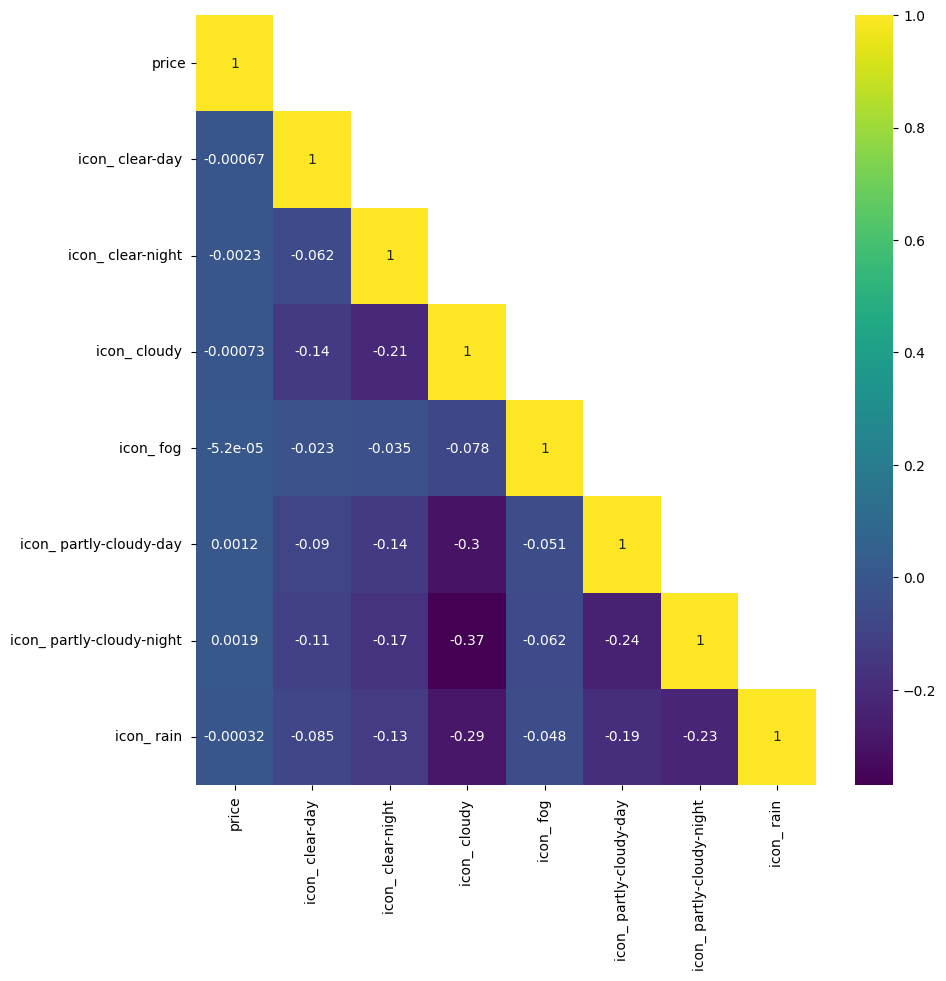

In [393]:
#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_icon.corr(), annot=True, cmap='viridis', mask=np.triu(df_icon.corr(), k=1))

**Insight:** dapat dilihat bahwa kolom summary dan kolom icon tidak ada pengaruh ke price karena nilai korelasi mereka terlalu rendah yaitu hampir 0. Jadi drop kolom kolom tersebut

In [394]:
#hapus kolom summary dan icon
df = df.drop(columns=['short_summary_ Clear ','short_summary_ Drizzle ', 'short_summary_ Foggy ',
             'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ','short_summary_ Overcast ',
             'short_summary_ Partly Cloudy ','short_summary_ Possible Drizzle ', 'short_summary_ Rain ',
             'icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ','icon_ partly-cloudy-day ', 
             'icon_ partly-cloudy-night ','icon_ rain '], axis=1)

#cek dataframe
df.head()

,index,hour,day,month,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,9,16,12,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,27,11,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,28,11,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,30,11,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3,29,11,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [395]:
#cek kolom
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

<Axes: >

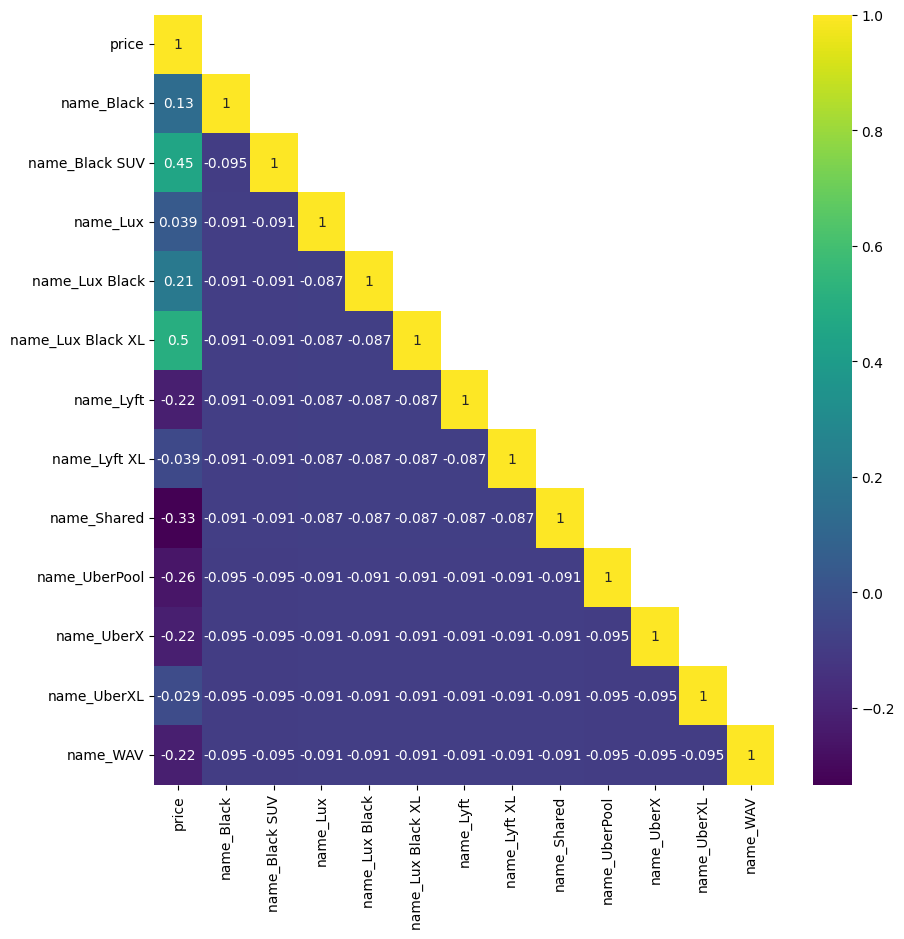

In [396]:
#cek korelasi antara price dengan kolom yang berhubungan dengan name
name_cols = [col for col in df.columns if 'name' in col]

#membuat dataframe baru yang berisi kolom name dan price
df_name = df[['price'] + name_cols]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_name.corr(), annot=True, cmap='viridis', mask=np.triu(df_name.corr(), k=1))

**Insight:** beberapa nilai dari kolom name memiliki pengaruh terhadap nilai price

In [397]:
df.columns

Index(['index', 'hour', 'day', 'month', 'cab_type', 'price', 'distance',
       'surge_multiplier', 'name_Black', 'name_Black SUV', 'name_Lux',
       'name_Lux Black', 'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL',
       'name_Shared', 'name_UberPool', 'name_UberX', 'name_UberXL',
       'name_WAV'],
      dtype='object')

<Axes: >

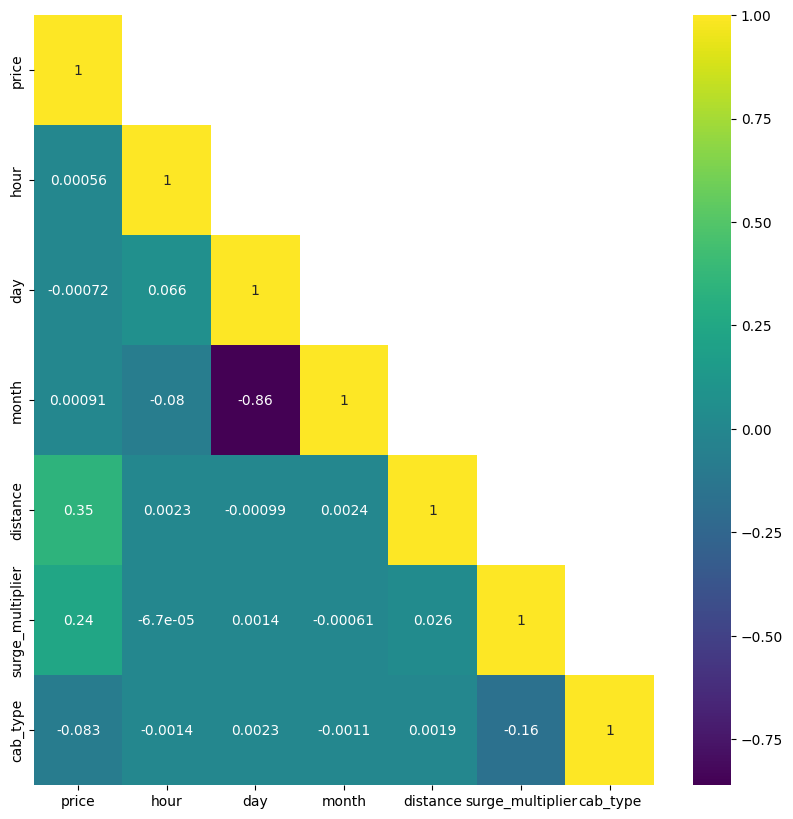

In [398]:
#analisis sisa kolom yang berhubungan dengan price
sisa_cols = ['price','hour', 'day', 'month', 'distance', 'surge_multiplier','cab_type']

#membuat dataframe baru yang berisi kolom sisa dan price
df_sisa = df[sisa_cols]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_sisa.corr(), annot=True, cmap='viridis', mask=np.triu(df_sisa.corr(), k=1))

**Insight:** dari hasil analisis terhadap kolom kolom tersebut bisa dilihat bahwa fitur hour, day, month memiliki korelasi yang rendah. tetapi, kolom distance dan surge_multiplier memiliki korelasi yang bagus dengan price. jadi drop kolom kolom yang memiliki korelasi yang rendah

In [399]:
df = df.drop(['hour', 'day', 'month'], axis=1)

In [400]:
df.head()

,index,cab_type,price,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0,0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,0,11.0,0.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,26.0,0.44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [401]:
#cek missing value
df.isnull().sum()

index                0
cab_type             0
price                0
distance             0
surge_multiplier     0
name_Black           0
name_Black SUV       0
name_Lux             0
name_Lux Black       0
name_Lux Black XL    0
name_Lyft            0
name_Lyft XL         0
name_Shared          0
name_UberPool        0
name_UberX           0
name_UberXL          0
name_WAV             0
dtype: int64

Selanjutnya akan dilakukan pengecekan outlier pada kolom price

In [402]:
#cnilai quartil atas dan bawah dari olom price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

#cek outlier
IQR = Q3 - Q1
IQR

13.5

<Axes: xlabel='price'>

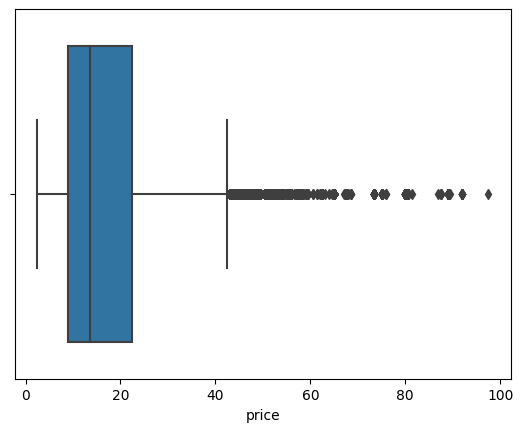

In [403]:
#cek outlier visualisasi
sns.boxplot(x=df['price'])

In [404]:
#cek outlier
oulier = np.where((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))
print(oulier)
print(np.count_nonzero(oulier))

(array([   645,    646,    706, ..., 637813, 637878, 637917]),)
5589


Hapus semua 5357 baris pada array tersebut, karena jika outliers tersebut diikutkan nilai error akan bertambah

In [405]:
#hapus outlier
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]
df.shape

(632387, 17)

distance: 0.7767586390092645


<Figure size 640x480 with 0 Axes>

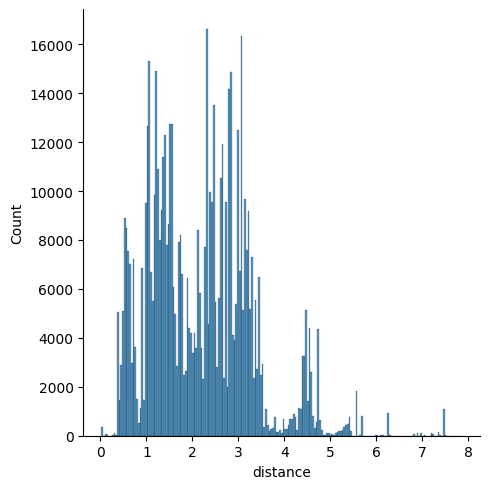

surge_multiplier: 8.84761157540221


<Figure size 640x480 with 0 Axes>

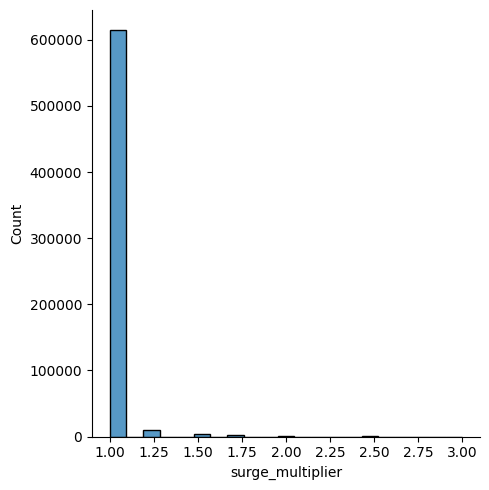

In [406]:
#  cek skewness dari distance dan surge_multiplier
columns = ['distance', 'surge_multiplier']
for col in columns:
    print(col + ':', df[col].skew())
    plt.figure()
    sns.displot(df[col])
    plt.show()

**Insight**: kolom distance dan surge multiplier memiliki skew yang sangat tinggi dengan nilai 0.77 dan 8.84. cek nilai korelasi pada kolom kolom tersebut terhadap predictand(price)

<Axes: >

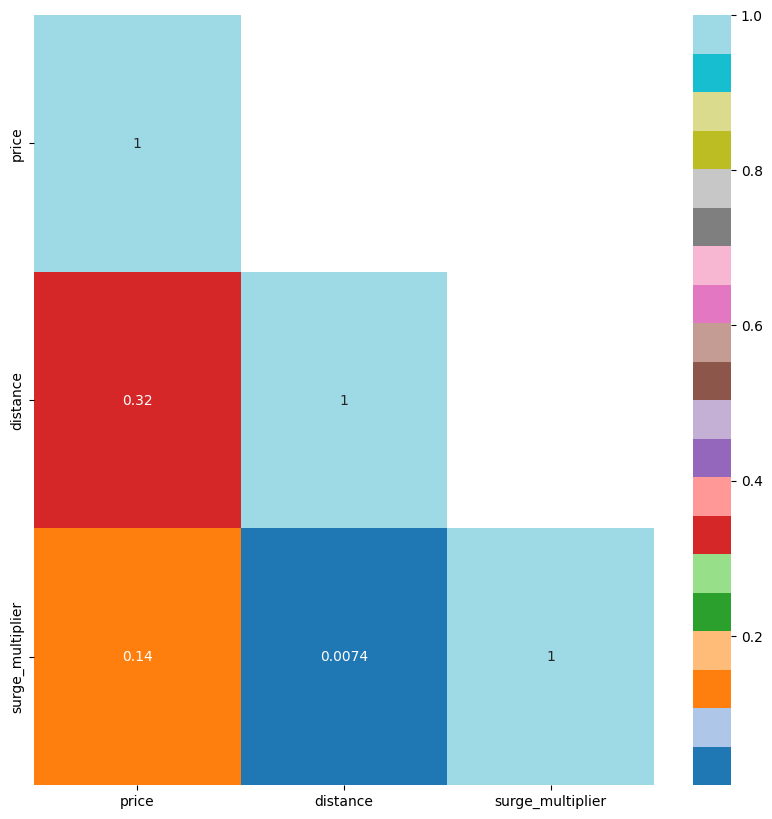

In [407]:
#cek korelasi antara distance dan surge_multiplier dengan price
columns = ['price','distance', 'surge_multiplier']

#membuat dataframe baru yang berisi kolom distance dan surge_multiplier
df_distance = df[columns]

#visualisasi korelasi
plt.figure(figsize=(10,10))
sns.heatmap(df_distance.corr(), annot=True, cmap='tab20', mask=np.triu(df_distance.corr(), k=1))

**Insight**: surge multiplier memiliki nilai skew yang tinggi dan korelasi yang kurang dengan predictand (price), dimana kolom distance meliki korelasi yang baik.jadi hapus skewneww dari surge multiplier menggunakan transformasi BoxCox.Transformasi Box-Cox merupakan transformasi pangkat pada variabel respons yang dikembangkan oleh Box dan Cox, yang bertujuan untuk menormalkan data, melinearkan model regresi dan menghomogenkan varians.

In [408]:
#transformasi dengan boxcox pada surge_multiplier
df['surge_multiplier'] = stats.boxcox(df['surge_multiplier'])[0]
pd.Series(df['surge_multiplier']).skew()

5.64331840785854

Skewness dari kolom Surge_multiplier dikurangi dari 8.84 menjadi 5.64

In [409]:
#describe price
df['price'].describe()

count    632387.000000
mean         16.245314
std           8.769536
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          42.500000
Name: price, dtype: float64

**Inisght:** dapat dilihat pada hasil perhitungan diantas bahwa rata-rata dari price yaitu 16.245314 dan standar deviasinya 8.769536

In [410]:
#cek kolom
df.columns

Index(['index', 'cab_type', 'price', 'distance', 'surge_multiplier',
       'name_Black', 'name_Black SUV', 'name_Lux', 'name_Lux Black',
       'name_Lux Black XL', 'name_Lyft', 'name_Lyft XL', 'name_Shared',
       'name_UberPool', 'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

In [411]:
#hapus kolom index
df.drop(columns=['index'], inplace=True,axis=1)

In [412]:
#cek kolom kembali
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'name_Black',
       'name_Black SUV', 'name_Lux', 'name_Lux Black', 'name_Lux Black XL',
       'name_Lyft', 'name_Lyft XL', 'name_Shared', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV'],
      dtype='object')

In [413]:
#rename semua kolom
df.rename(columns={'name_Black': 'Uber Black', 'name_Black SUV': 'Uber Black SUV', 'name_Lux': 'Uber Lux', 'name_Lux Black': 'Uber Lux Black', 'name_Lux Black XL': 'Uber Lux Black XL', 'name_Lyft': 'Lyft', 'name_Lyft XL': 'Lyft XL', 'name_Shared': 'Lyft Shared', 'name_UberPool': 'Uber Pool', 'name_UberX': 'Uber X', 'name_UberXL': 'Uber XL', 'name_WAV': 'Uber WAV'}, inplace=True)

In [414]:
#cek kolom
df.columns

Index(['cab_type', 'price', 'distance', 'surge_multiplier', 'Uber Black',
       'Uber Black SUV', 'Uber Lux', 'Uber Lux Black', 'Uber Lux Black XL',
       'Lyft', 'Lyft XL', 'Lyft Shared', 'Uber Pool', 'Uber X', 'Uber XL',
       'Uber WAV'],
      dtype='object')

In [415]:
#hapus kolom cab_type
df.drop(columns=['cab_type'], inplace=True,axis=1)
df.head()

,price,distance,surge_multiplier,Uber Black,Uber Black SUV,Uber Lux,Uber Lux Black,Uber Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,5.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [416]:
y = df['price']
y.head()

0     5.0
1    11.0
2     7.0
3    26.0
4     9.0
Name: price, dtype: float64

In [417]:
X = df.drop(columns=['price'], axis=1)
X.head()

,distance,surge_multiplier,Uber Black,Uber Black SUV,Uber Lux,Uber Lux Black,Uber Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Pendefinisian, Pelatihan, dan Evaluasi Model

In [418]:
# split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

#### 1. Linear regression

Regresi linear adalah metode statistik sederhana yang banyak digunakan untuk memodelkan hubungan antara variabel dependen dengan satu atau lebih variabel independen. Metode ini mengasumsikan hubungan linear antara variabel, di mana variabel dependen dapat diprediksi berdasarkan nilai-nilai variabel independen. Model ini memodelkan hubungan tersebut sebagai garis lurus atau hiperplane dalam dimensi yang lebih tinggi.

In [419]:
# pendefinisian model linear regression
model = LinearRegression()

In [420]:
#pelatihan model
model.fit(X_train, y_train)

LinearRegression()

In [421]:
y_pred = model.predict(X_test)

In [422]:
#MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

#MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# cek r2 score
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.6918301358332115
MAPE: 0.1306543777690785
R2 score: 0.9306152372363176


In [423]:
print("Train accuracy :", model.score(X_train, y_train))
print("Test accuracy :", model.score(X_test, y_test))

Train accuracy : 0.9307570982627448
Test accuracy : 0.9306152372363176


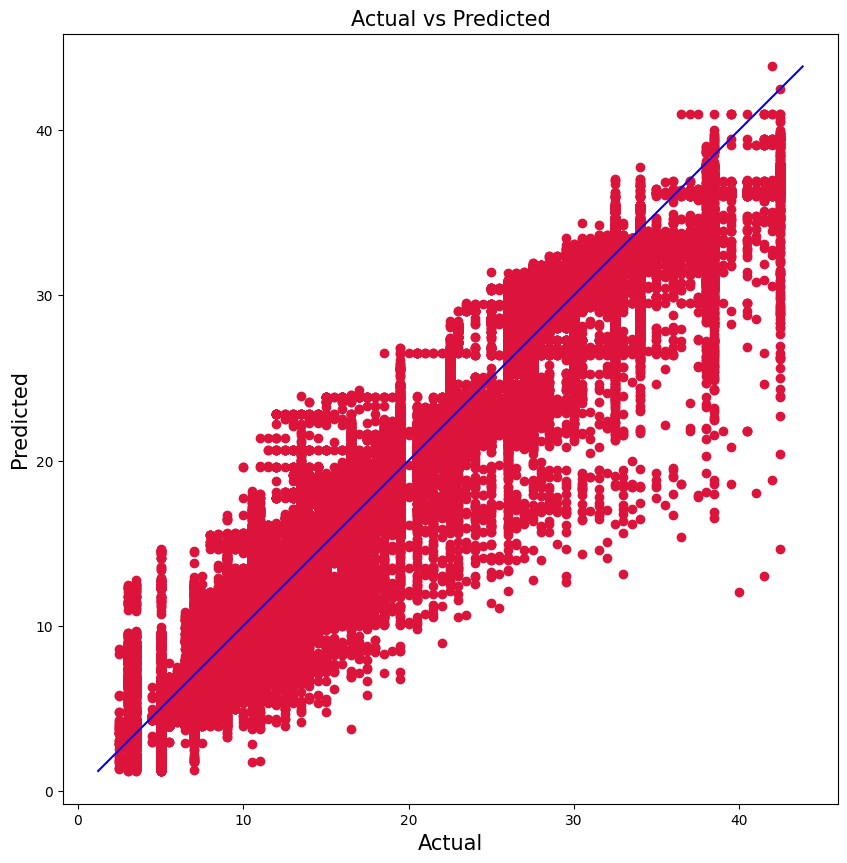

In [424]:
# visualisasi hasil prediksi
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.title('Actual vs Predicted', fontsize=15)
plt.show()

#### 2. Random Forest regression

Random Forest adalah algoritma pembelajaran mesin yang berbasis pada ensemble learning, yang menggabungkan sejumlah besar pohon keputusan (decision tree) menjadi satu model yang kuat. Metode ini dikembangkan untuk meningkatkan kinerja dan stabilitas prediksi dibandingkan dengan penggunaan satu pohon keputusan. Random Forest memiliki beberapa keuntungan, termasuk kemampuan untuk menangani data yang besar, data dengan banyak atribut, dan data yang memiliki atribut yang tidak relevan. Algoritma ini juga tahan terhadap overfitting dan memiliki performa yang baik dalam banyak kasus, termasuk dalam masalah klasifikasi dan regresi.

In [425]:
# model random forest regressor
modelRF = RandomForestRegressor()

In [426]:
#pelatihan model
modelRF.fit(X_train, y_train)

RandomForestRegressor()

In [427]:
y_pred = modelRF.predict(X_test)

In [428]:
#MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

#MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# cek r2 score
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.1471785311608431
MAPE: 0.08484307897848754
R2 score: 0.960259787329363


In [429]:
print("Train accuracy :", modelRF.score(X_train, y_train))
print("Test accuracy :", modelRF.score(X_test, y_test))

Train accuracy : 0.962627902457079
Test accuracy : 0.960259787329363


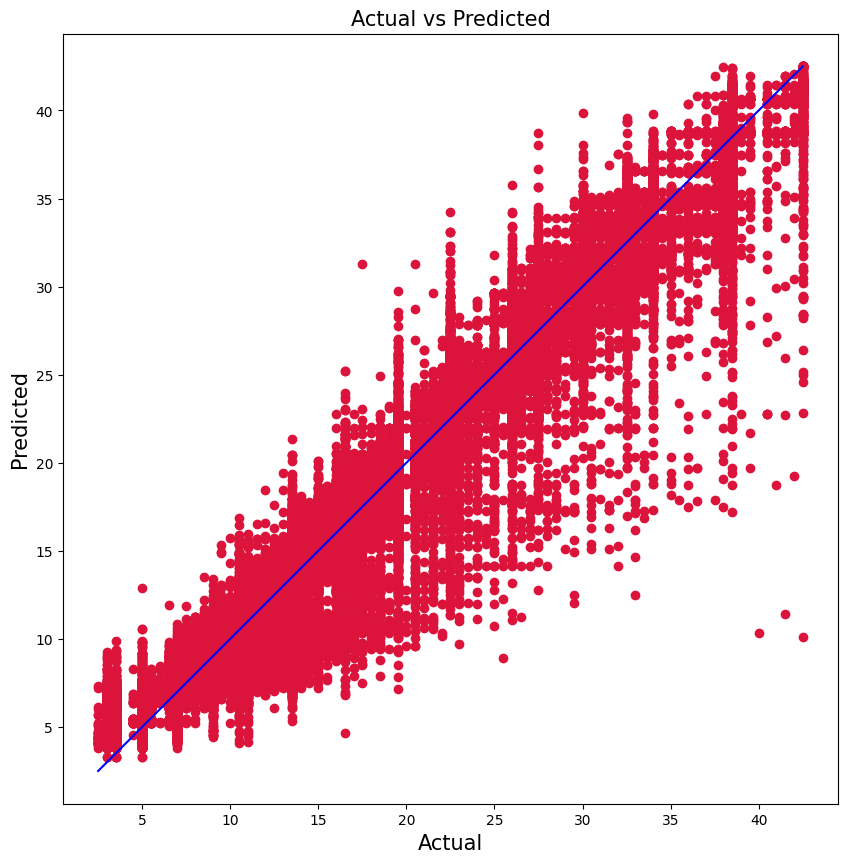

In [430]:
# visualisasi hasil prediksi
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.title('Actual vs Predicted', fontsize=15)
plt.show()

#### 3. Deccision Tree

Decision tree untuk prediksi adalah metode pemodelan prediktif yang menggunakan struktur pohon keputusan untuk memprediksi nilai atau kelas target berdasarkan fitur-fitur input. Decision tree untuk prediksi adalah algoritma yang fleksibel, mudah dipahami, dan dapat digunakan dalam berbagai jenis masalah prediksi, seperti prediksi harga, prediksi penjualan, prediksi churn pelanggan, dan lainnya. Namun, decision tree juga memiliki beberapa kelemahan, seperti kecenderungan terhadap overfitting jika tidak dikendalikan, sensitivitas terhadap perubahan kecil pada data input, dan kesulitan dalam menangani atribut kontinu.

In [431]:
modelDT = DecisionTreeRegressor()

In [432]:
#pelatihan model
modelDT.fit(X_train, y_train)

DecisionTreeRegressor()

In [433]:
y_pred = modelDT.predict(X_test)

In [434]:
#MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

#MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# cek r2 score
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.1477034934970056
MAPE: 0.08485985980105475
R2 score: 0.960127288657247


In [435]:
print("Train accuracy :", modelDT.score(X_train, y_train))
print("Test accuracy :", modelDT.score(X_test, y_test))

Train accuracy : 0.9626699692091245
Test accuracy : 0.960127288657247


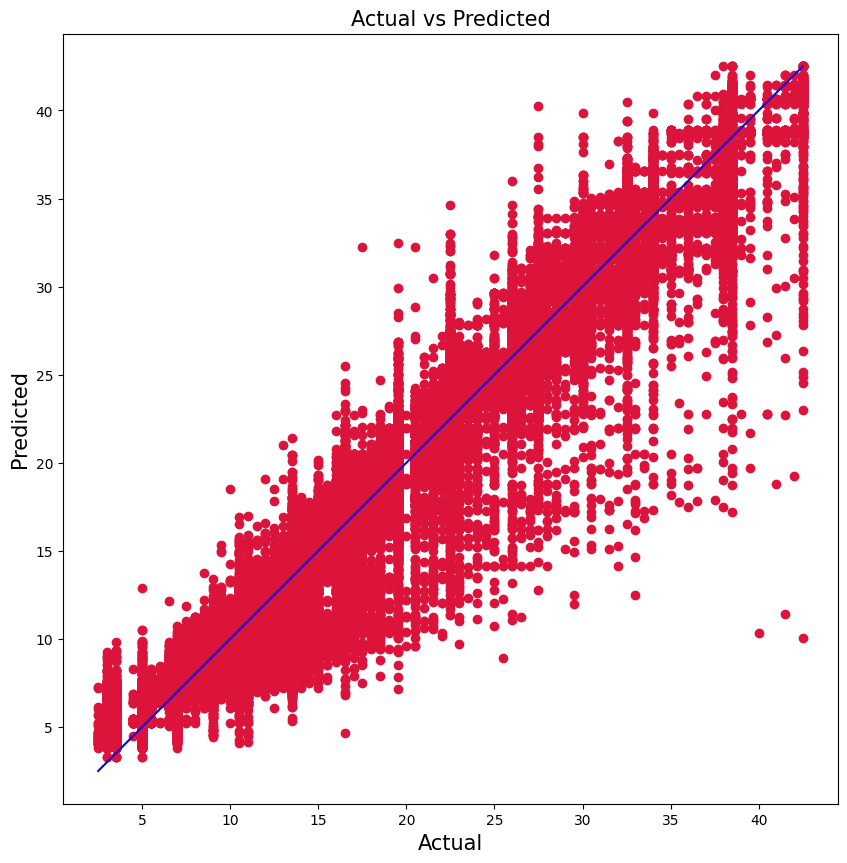

In [436]:
# visualisasi hasil prediksi
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.title('Actual vs Predicted', fontsize=15)
plt.show()

#### 4. Support Vector Regression (SVR)

Support Vector Regression (SVR) adalah metode regresi yang menggunakan pendekatan Support Vector Machines (SVM) untuk memodelkan hubungan antara variabel independen dan variabel dependen. SVR digunakan untuk memprediksi nilai numerik atau kontinu, bukan kategori. Dalam penerapannya, agar proses pelatihan sedikit lebih cepat maka digunakan teknik sampling pada data.

In [437]:
# sampling data untuk pelatihan model svr agar lebih cepat
df_sample = df.sample(n=10000, random_state=2020)

y = df_sample['price']
y.head()

443568    27.0
523533     7.0
14619      9.0
461402     5.0
421855     7.0
Name: price, dtype: float64

In [438]:
X = df_sample.drop(columns=['price'], axis=1)
X.head()

,distance,surge_multiplier,Uber Black,Uber Black SUV,Uber Lux,Uber Lux Black,Uber Lux Black XL,Lyft,Lyft XL,Lyft Shared,Uber Pool,Uber X,Uber XL,Uber WAV
443568,0.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523533,1.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14619,1.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
461402,1.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
421855,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [439]:
# split data menjadi train dan test
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [440]:
modelSVR = SVR()

#pelatihan model
modelSVR.fit(X1_train, y1_train)

SVR()

In [441]:
y_pred = modelSVR.predict(X_test)

In [442]:
#MAE
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

#MAPE
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

# cek r2 score
print('R2 score:', metrics.r2_score(y_test, y_pred))

MAE: 1.3808398113231735
MAPE: 0.09616120091451835
R2 score: 0.9326674892125046


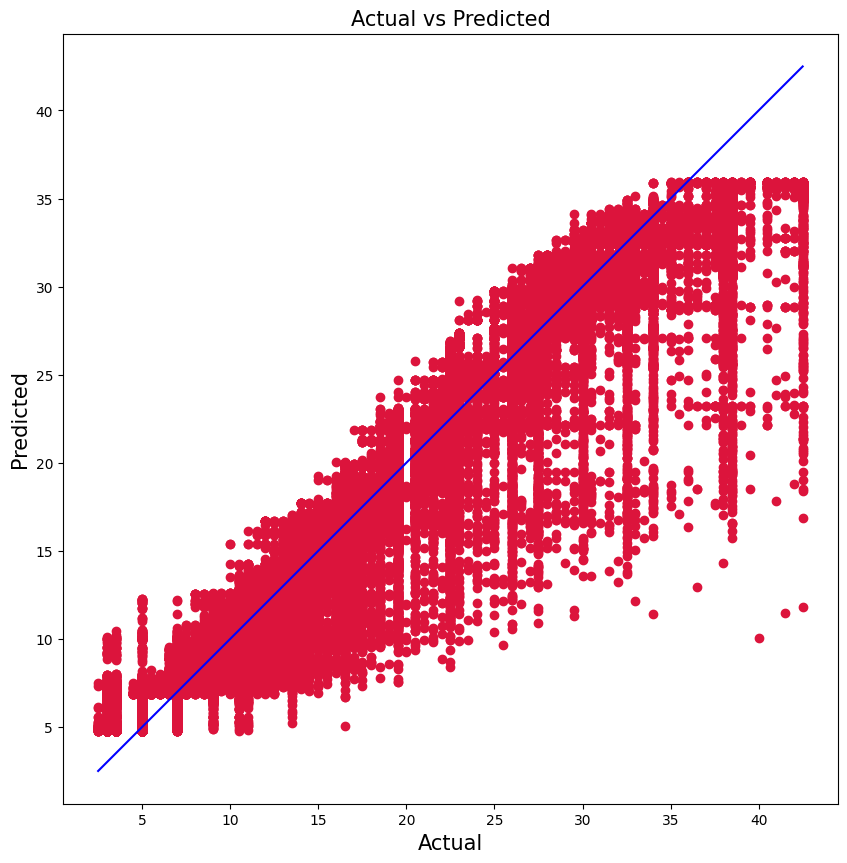

In [443]:
# visualisasi hasil prediksi
plt.figure(figsize=(10,10))

plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.title('Actual vs Predicted', fontsize=15)
plt.show()

## Model Interface

Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

#### 1. Linear Regression

In [444]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [445]:
predict_price('Uber Black SUV',1.2, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


27.431927722654915

In [446]:
predict_price('Lyft',2.38, 0.0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9.614021764094769

#### 2. Random Forest

In [447]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return modelRF.predict([x])[0]

In [448]:
predict_price('Uber Black SUV',1.2, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


26.686538780663774

#### 3.Deccision Tree

In [449]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return modelDT.predict([x])[0]

In [450]:
predict_price('Uber Black SUV',1.2, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


26.666666666666668

#### 4. Support Vector Regression (SVR)

In [451]:
def predict_price(name_cab,distance,surge_multiplier):
    loc_index = np.where(X.columns==name_cab)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = distance
    x[1] = surge_multiplier
    if loc_index >= 0:
        x[loc_index] = 1

    return modelSVR.predict([x])[0]

In [452]:
predict_price('Uber Black SUV',1.2, 0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


26.76701421830409

In [453]:
# simpan model
pickle.dump(model, open('model.pkl','wb'))

## Kesimpulan

Project ini dikerjakan dengan VsCode untuk mempermudah proses pembacaan data.Dimana dataset ini memiliki dimensi yang sangat besar yaitu 693071 × 57. 57 fitur yang ada harus dianalisis guna mengetahui fitur mana saja yang memiliki korelasi yang cukup untuk digunakan dalam proses prediksi. Tujuan utama dari project ini yaitu untuk memprediksi harga,maka fitur price dijadikan sebagai variabel dependent. Variabel dependent yaitu variabel yang nilainya ingin diprediksi berdasarkan hubungannya dengan variabel independen. Dalam proses pemilihan fitur, digunakan fungsi korelasi yang dibantu dengan visualisasi data dari heatmap plot. Setelah dilakukan analisis, dari 57 fitur yang ada, kami mengambil fitur distance,surge_multiplier, dan name_cab dengan alasan dari ketiga fitur tadi memiliki korelasi yang cukup berpengaruh terhadap variabel dependent yaitu price. Pada proses Exploratory Data Analysis, kami mendapatkan insight bahwa Top 5 source-destination pada cab jenis uber dan lyft adalah sama, yaitu : Financial District-South Station (dan sebaliknya), Back Bay-North End (dan sebaliknya), West End-Fenway.Transaksi berdasarkan nama cab pada uber dan lyft memiliki jumlah yang merata namun beda nilai,berdasarkan fitur short_summary jumlah transaksi tertinggi terjadi ketika hari mendung dan terendah terjadi ketika gerimis. Black SUV menjadi harga tertinggi pada jenis uber dan UberPool menjadi harga paling rendah. Pada jenis Lyft, Lux Black XL menjadi harga paling tinggi dan Shared menjadi yang terendah. Untuk membuat model prediksi, kami menerapkan beberapa algoritma machine learning yaitu Linear Regression, Random Forest, Deccision Tree, dan Support Vector Regression (SVR). Dimana proses prediksi menggunakan R2 score dengan memanfaatkan library scikit-learn untuk mempermudah proses prediksi.R2 Score adalah metrik evaluasi yang digunakan dalam analisis regresi untuk mengukur sejauh mana variabilitas dalam variabel dependen dapat dijelaskan oleh model regresi. Dalam penerapan algoritma yang berbeda menghasilkan akurasi yang berbeda pula. Dapat dilihat bahwa untuk penggunaan algoritma linear regression, hasil prediksi model menghasilkan nilai sebesar 0.93 atau 93%, algoritma Random Forest Regression menghasilkan nilai prediksi 0,96 atau 96%, Deccision Tree menghasilkan nilai prediksi 0.96 atau 96%, dan SVR menghasilkan nilai prediksi 0.93 atau 93%. Hasil dari keempat algoritma menunjukan nilai prediksi yang baik. Dan terakhir, kami menggunakan pickle untuk menyimpan model yang telah dibuat. Kemudian dikarenakan akurasi keakuratan menjadi yang utama maka algoritma random forest paling sesuai untuk kasus ini. Alasan lainnya yaitu kemampuannya dalam menangani hubungan non-linear, mengatasi overfitting, dan memiliki kinerja prediksi yang baik di banyak kasus. Random forest juga dapat memberikan informasi penting tentang pentingnya setiap variabel dalam membuat prediksi.